# Data Science

***


WS 2022

Dr. Cristian Grozea


***

## Data Science


- k-Nearest Neighbours


# Course Plan

1. Introduction to Machine Learning (ML)
    * #Examples of Applications
    * #Types of machine learning
    * #Issues around ML
    * #Testing and Validation
1. Classification and Regression
    * #Datasets
    * #Binary classification
    * #Accuracy measures
    * #Multiclass classification
1. Various model types and Training models
    * #Linear regression
    * #Polynomial regression
    * Regularisation
    * Logistic Regression
    * Training Models
1. Support Vector Machines
1. Decision Trees
1. Ensemble Learning and Random Forest
1. #Dimensionality Reduction
1. Unsupervised Learning
1. #Statistics: Definitions and Tools
1. (Neural Networks/Deep Learning)

    


# Local learning
- A complex problem can usually be decomposed into less complex subproblems

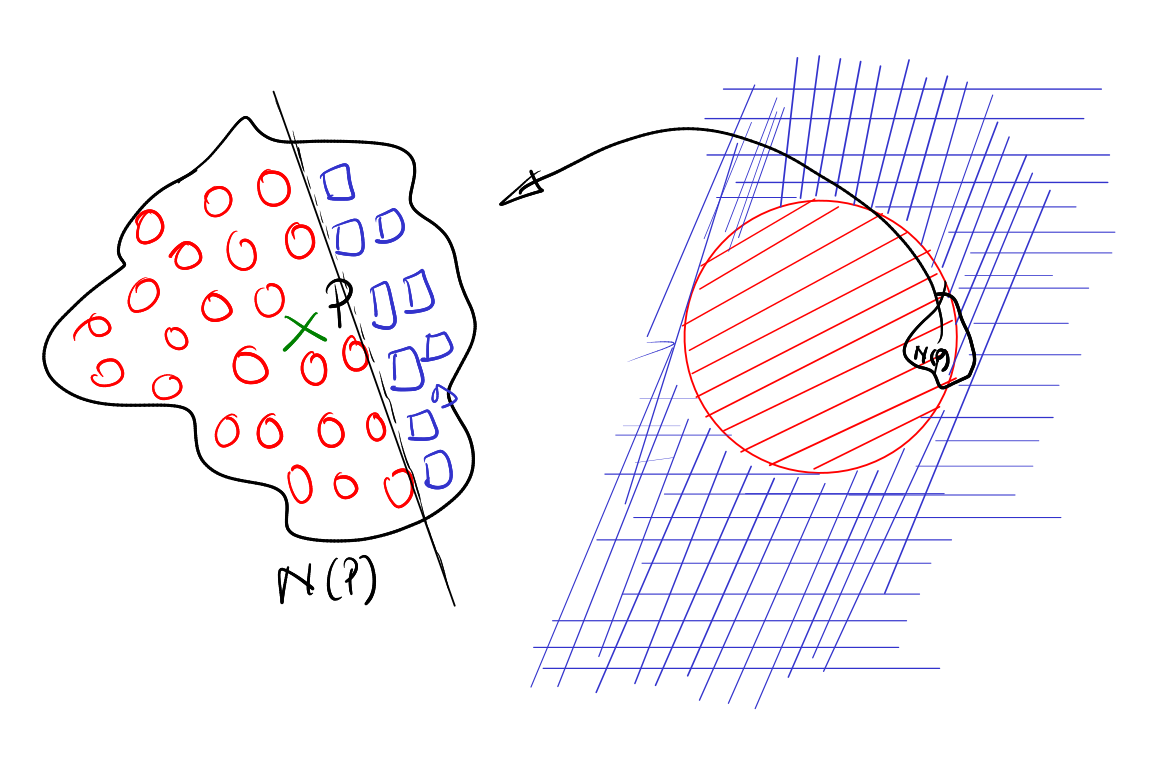

- When one has to predict on a new point $P$:
    - isolate a neighbourhood of $P$, $N(P)$ 
    - consider the subproblem made of all datapoints that fall into this neighbourhood $N(P)$
    - fit a model $M$ for this problem 
    - use it to predict for the point, prediction is $M.predict(P)$
- Advantages:
    - The smaller local neighbourhood might allow for simpler models
        - in the example the nonlinear boundary can be locally approximated by a linear boundary
- Disadvantages:
    - Speed - each prediction requires a local model fitting
    - It might require more data than otherwise - but it depends on how the neighbourhoods are defined
- Examples:
    - k-NN density estimation
    - k-NN classification
    - k-NN regression
    

## K-NN Density estimation

What is density estimation?

What is the density of a continuous random variable?

Live demo https://chat.openai.com

Q: explain in simple terms, what is the density of random variable?

A: 
> In simple terms, the density of a random variable is a measure of how likely it is for the random variable to take on a particular value. For example, if a random variable has a high density at a certain value, then it is more likely to take on that value than if it had a low density at that value. The density of a random variable is typically represented by a function called the probability density function (PDF), which gives the density of the random variable for all possible values that it can take on. The PDF is often used to make predictions about the future values of the random variable, or to compare the distribution of values across different groups or conditions.

Possible to define mathematically starting with the cummulative distribution function, CDF, see https://en.wikipedia.org/wiki/Cumulative_distribution_function

$$CDF_X(a)=P(X<a)$$

$$PDF_X=CDF_X'$$

Q: what are examples of open problems in data science?

A: 
There are many open problems in data science, some of which include:

Developing more effective methods for learning from unstructured or incomplete data.

Improving the interpretability and fairness of machine learning models.

Finding ways to integrate and make sense of data from multiple sources and formats.

Developing new algorithms and approaches for dealing with large-scale and high-dimensional data.

Developing more effective methods for dealing with data that is noisy, biased, or collected from non-representative samples.

Finding ways to improve the efficiency and scalability of data processing and analysis algorithms.

Developing new tools and techniques for visualizing and exploring complex data sets.

Developing new approaches for addressing privacy and security concerns in data collection, storage, and analysis.

Finding ways to apply data science techniques to solve real-world problems in a variety of domains, such as healthcare, finance, and education.

Developing new theoretical foundations for data science, and understanding the limitations and potential risks of existing methods.

### some data

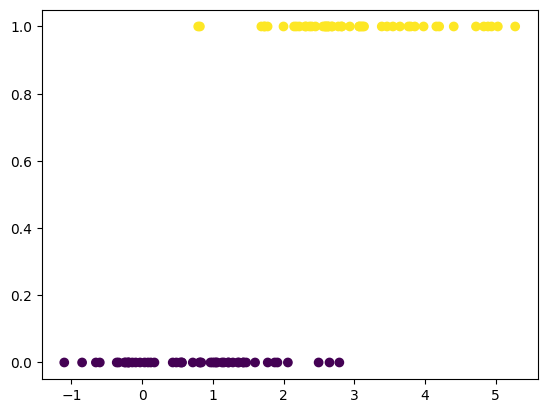

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
np.random.seed(81)

x,y=sklearn.datasets.make_blobs(centers=[[1],[3]], n_features=1,cluster_std=1)

plt.scatter(x,y,c=y)
x0=x[y==0]

### Optimal decision
Gaussian pdf
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

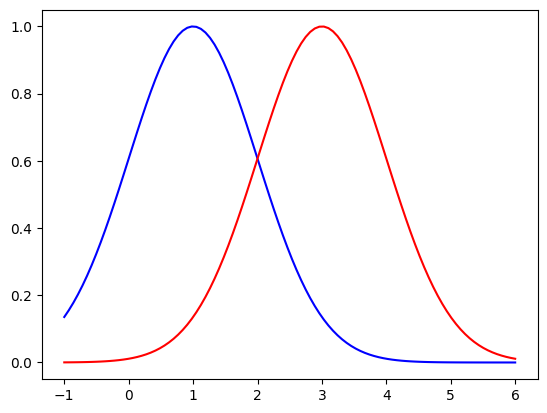

In [3]:

t=np.linspace(-1,6,100)
plt.plot(t,np.exp(-(t-1)**2/2),'b')
plt.plot(t,np.exp(-(t-3)**2/2),'r')

Text(0.5, 0, 'value')

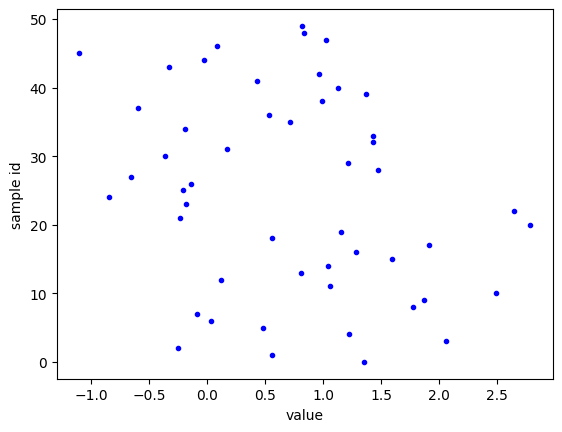

In [4]:
plt.figure()
plt.plot(x[y==0],range(sum(y==0)),'b.'); plt.ylabel('sample id');plt.xlabel('value')
# plt.plot(x[y==1],range(sum(y==0)),'r.');  plt.ylabel('sample id');plt.xlabel('value')


- how dense is the data in a given point?
- where is the density of the data higher?

Text(0.5, 1.0, 'a statistical view (CDF)')

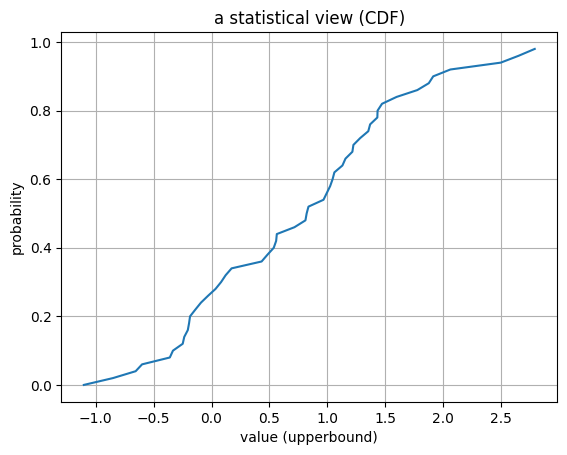

In [5]:
plt.plot(sorted(x0),np.arange(len(x0))/len(x0)); plt.ylabel('probability');plt.xlabel('value (upperbound)');plt.grid(1)
plt.title('a statistical view (CDF)')

Text(0.5, 1.0, 'a different view')

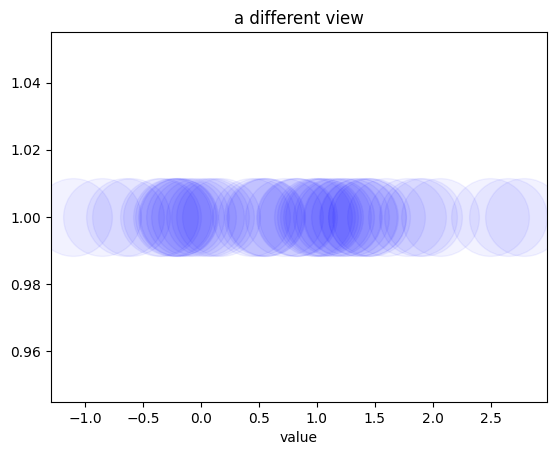

In [6]:
plt.plot(x0,np.ones(len(x0)),'bo',ms=56,alpha=0.05);plt.xlabel('value')
plt.title('a different view')

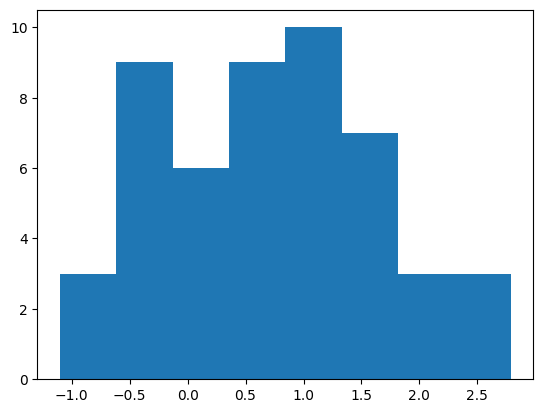

In [20]:
#histogram
plt.hist(x0,8);

## Deriving k-NN classifer as a local density estimator

- Fixed neighbourhood (sphere of always the same radius)
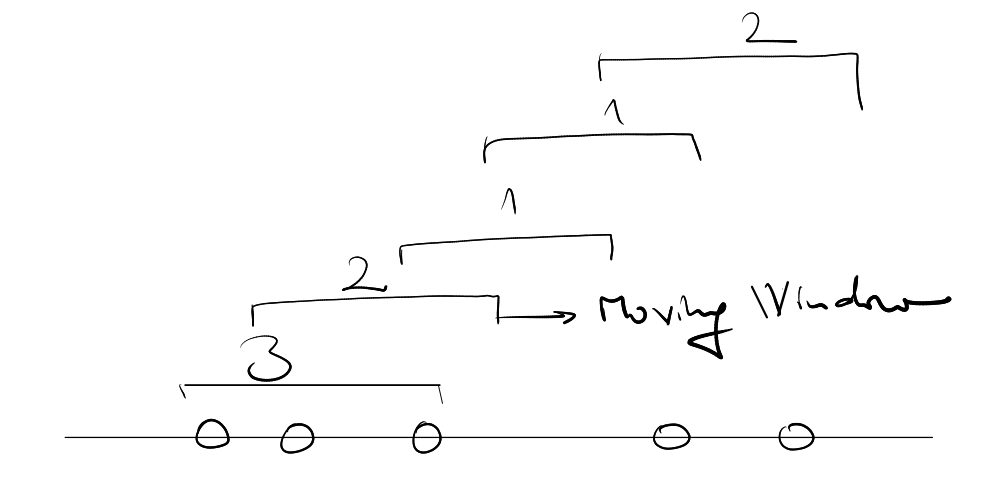

$$density \approx \frac{k}{V}$$
- $V$=the volume o the neighbourhood
- $k$=how many points are inside
- what if only two points in?
- what if only one point of a single class in?

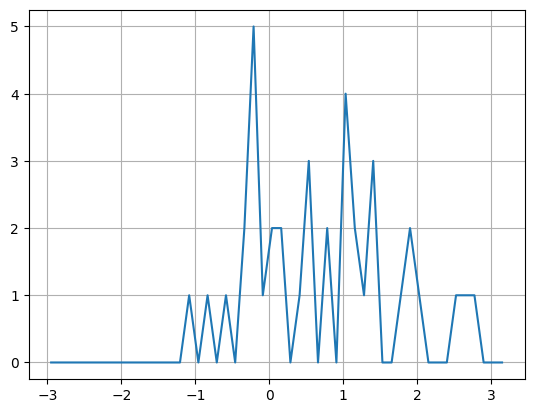

In [8]:
width=0.1
inside=[sum((x0>=left) & (x0<left+width)) for left in np.linspace(-3,3.100)]
plt.plot( np.linspace(-3,3.100)+width/2,inside)
plt.grid(1)

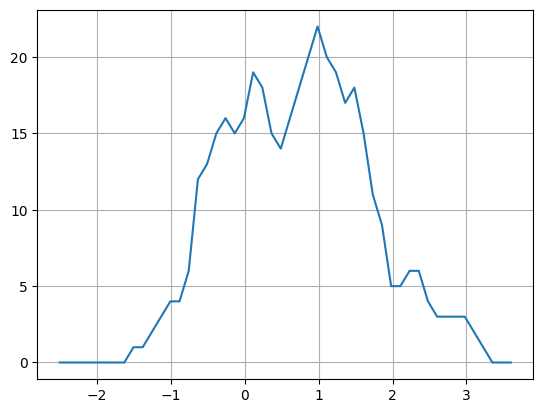

In [23]:
width=1
inside=[sum((x0>=left) & (x0<left+width)) for left in np.linspace(-3,3.100)]
plt.plot(np.linspace(-3,3.100)+width/2,inside)
plt.grid(1)

- with the right window width, it provides a more nuanced view than the histogram
- how to find the corect window size?
- **k-NN approach**: take the smallest window that contains **k** samples

$$density \approx \frac{k}{V}$$


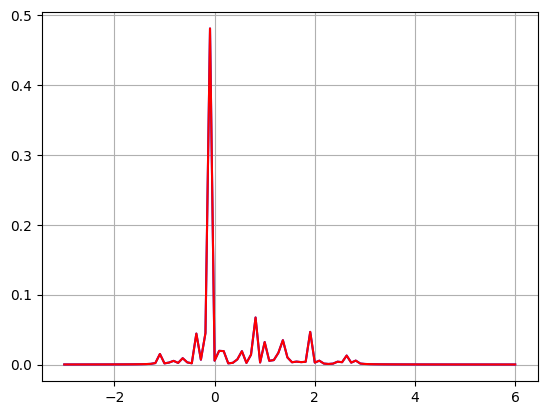

In [45]:
import sklearn.metrics
points=np.linspace(-3,6,100)
dmat=sklearn.metrics.pairwise_distances(points[:,np.newaxis],x0)
distances_sorted=np.sort(dmat,axis=1)

k=1
distknnorig=k/distances_sorted[:,k-1]
distknn=k/np.mean(distances_sorted[:,:k],axis=1)# hinted by chatgpt

distknnorig/=np.sum(distknnorig)
distknn/=np.sum(distknn)


# plt.imshow(distances_sorted)
# plt.colorbar()

plt.plot(points,distknnorig,'b-')
plt.plot(points,distknn,'r-')
plt.grid(1)


## k-NN classification

- as the volume is the same, only how many of the nearest $k$ neighbours are in each of the classes matters


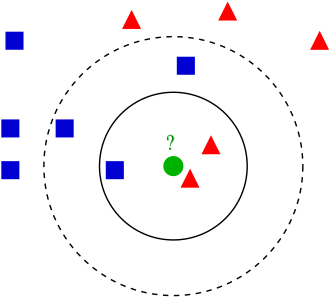`
[https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm]

Diuscussion: how large should be $k$?

[ https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html ]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


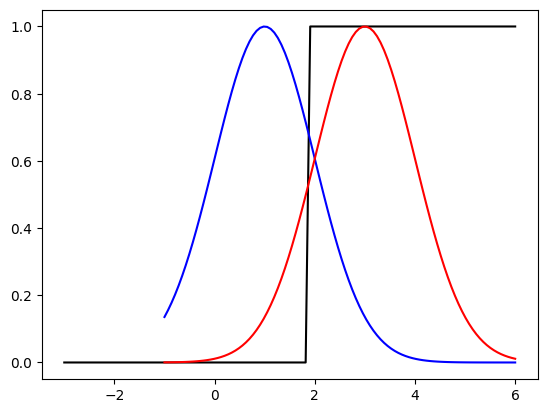

In [49]:
from sklearn.neighbors import KNeighborsClassifier
k=40
points=np.linspace(-3,6,100)
model=KNeighborsClassifier(n_neighbors=k)
model.fit(x,y)
yhat=model.predict(points[:,np.newaxis])
print(yhat)
plt.plot(points,yhat,'k')
plt.plot(t,np.exp(-(t-1)**2/2),'b')
plt.plot(t,np.exp(-(t-3)**2/2),'r')

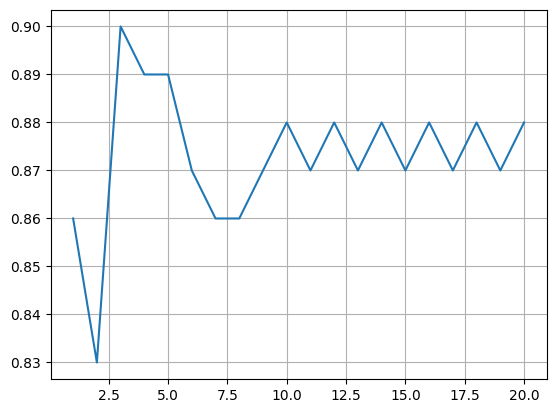

In [51]:
#cv
from sklearn.model_selection import cross_val_score
rr=range(20)
plt.plot([k+1 for k in rr],
 [np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k+1),x,y,cv=5)) 
  for k in rr])
plt.grid(1)

### Theoretical result about the performance of $k-NN$

For two classes, when the size of the training set tends towards infinity, the error is bounded by twice the Bayes error rate (the lowest error rate possible)


[https://en.wikipedia.org/wiki/Voronoi_diagram]
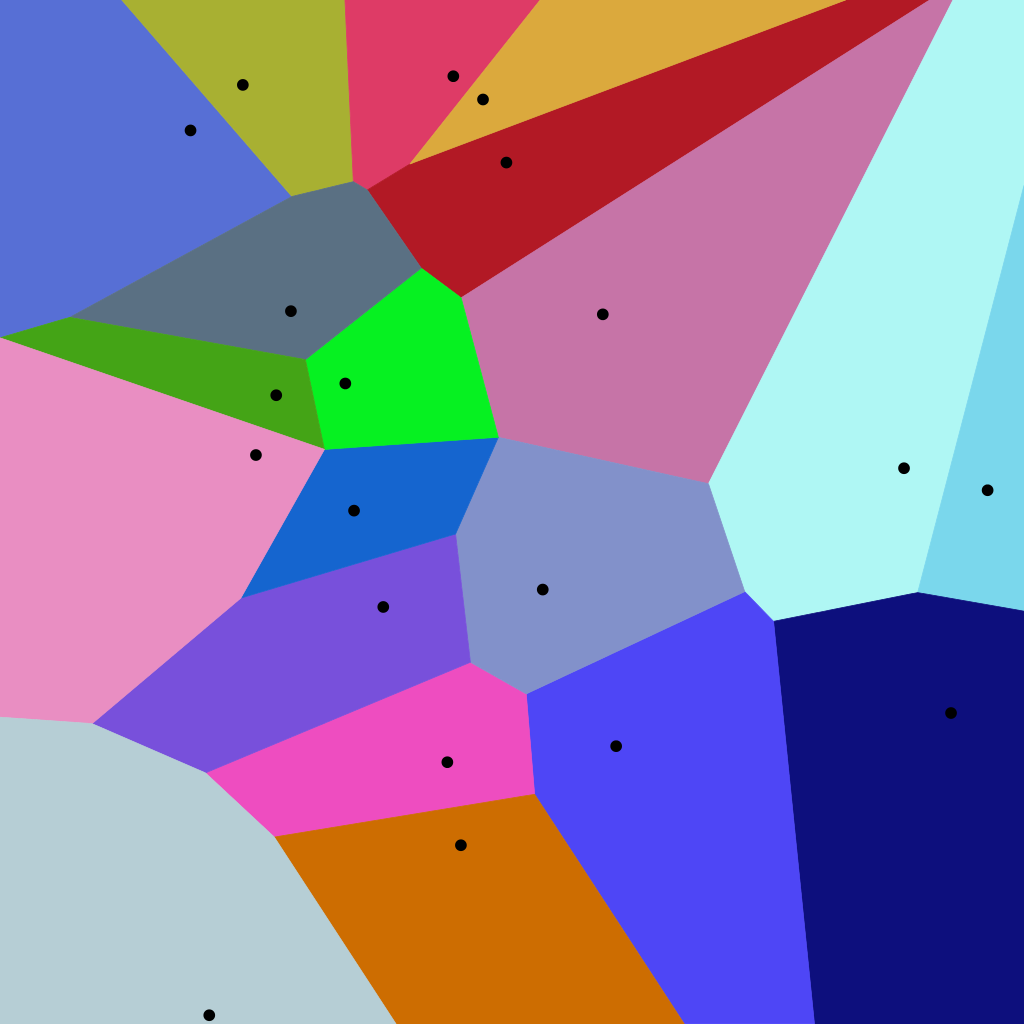

Discussion:
- choice of distance
- similarity functions
- kernels


L1 distance (Manhattan distance)

Points 

1000 1

2000 1

1000 7

2000 8


Distance matrix

0    1000    6   1007

1000    0  1006    7

6     1006   0   1001

1007  7    1001   0


*10^-9
*1

# Example: k-NN for Breast Cancer data
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer = load_breast_cancer()

In [53]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [55]:
cancer.data.shape

(569, 30)

(array([ 1.,  0.,  3.,  2.,  7.,  7., 11., 19., 20., 22., 45., 46., 48.,
        54., 52., 37., 38., 19., 20., 18., 20., 18., 25., 18.,  7.,  4.,
         2.,  2.,  1.,  3.]),
 array([1.94319217, 1.98962328, 2.03605439, 2.08248549, 2.1289166 ,
        2.17534771, 2.22177882, 2.26820992, 2.31464103, 2.36107214,
        2.40750324, 2.45393435, 2.50036546, 2.54679656, 2.59322767,
        2.63965878, 2.68608989, 2.73252099, 2.7789521 , 2.82538321,
        2.87181431, 2.91824542, 2.96467653, 3.01110764, 3.05753874,
        3.10396985, 3.15040096, 3.19683206, 3.24326317, 3.28969428,
        3.33612538]),
 <BarContainer object of 30 artists>)

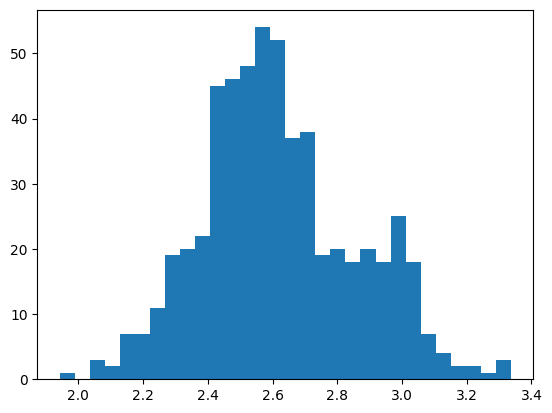

In [59]:
plt.hist(np.log(cancer.data[:,0]),30)

/tmp/ipykernel_6895/1249934815.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


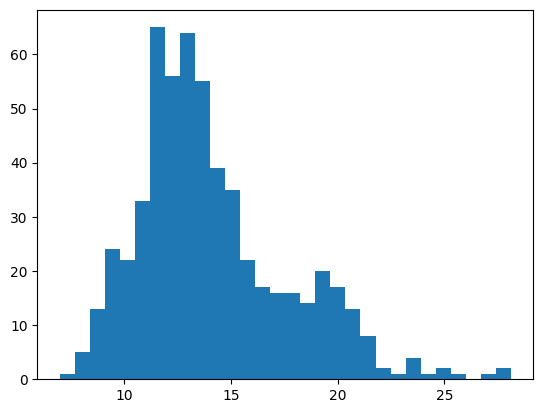

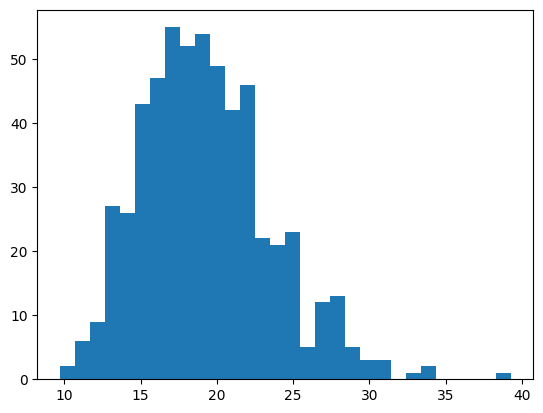

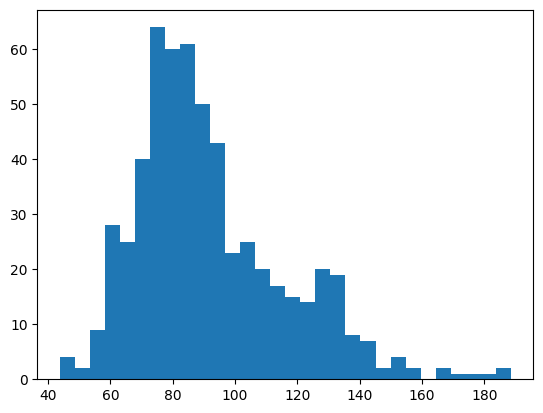

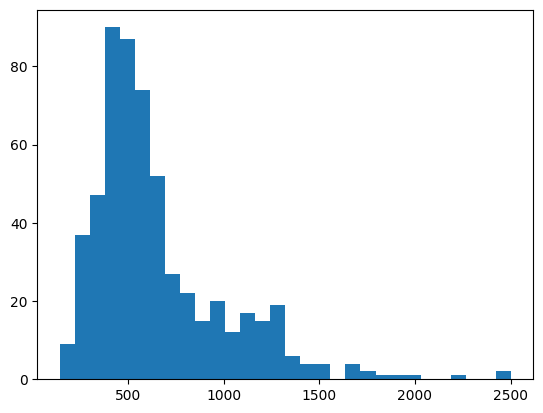

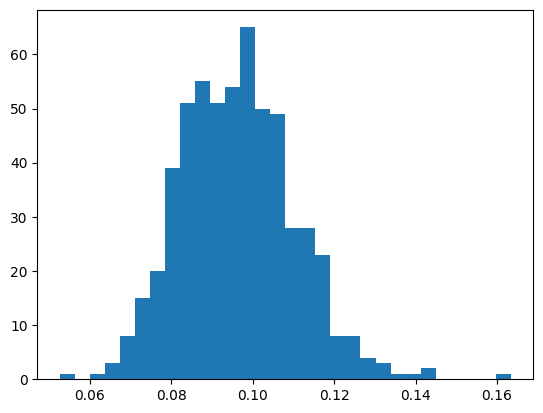

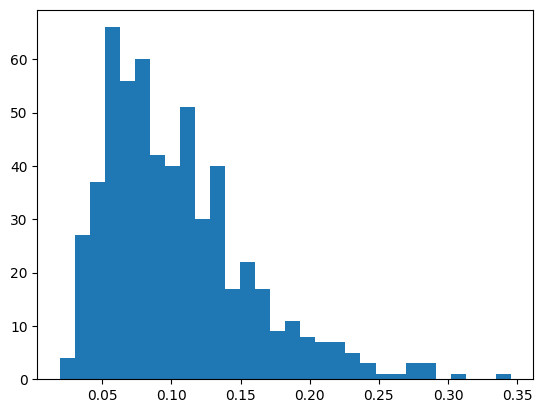

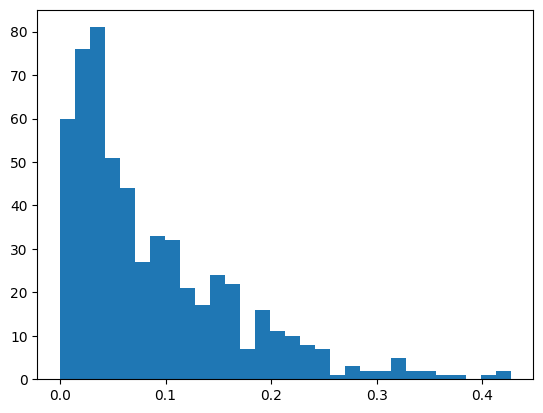

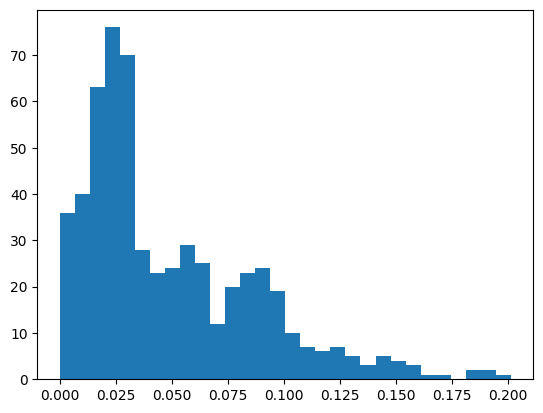

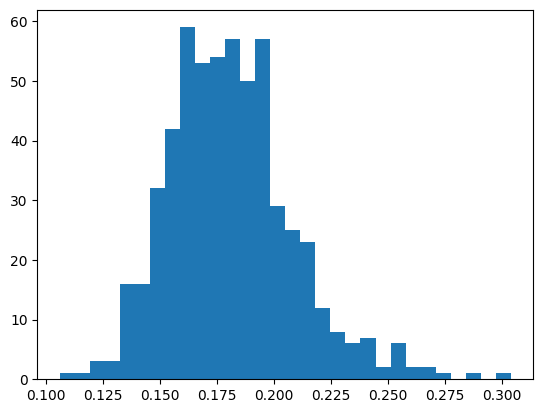

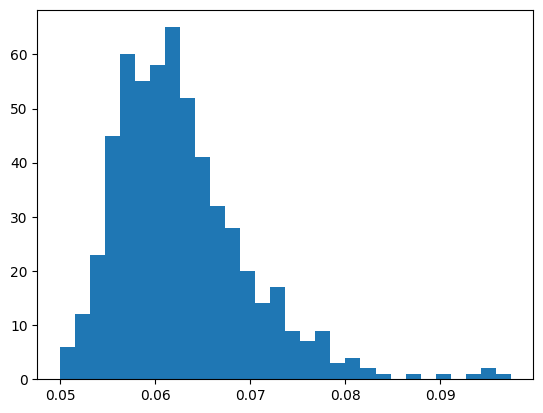

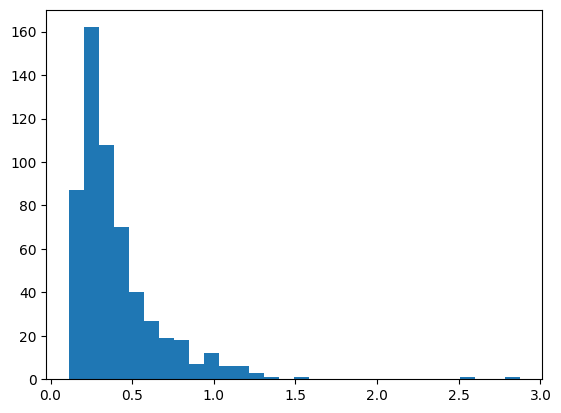

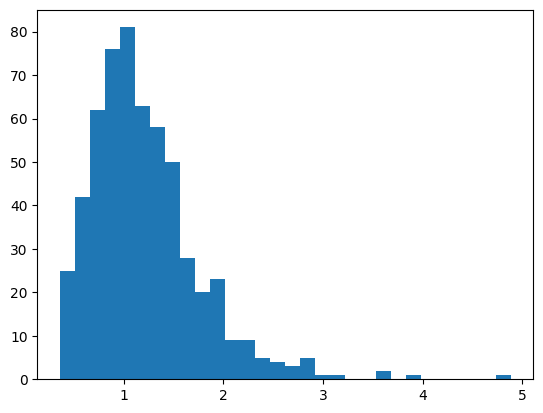

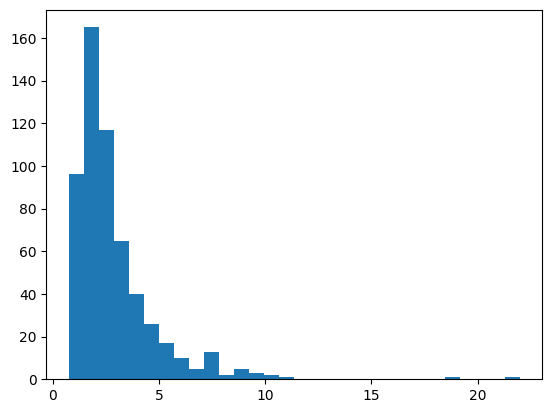

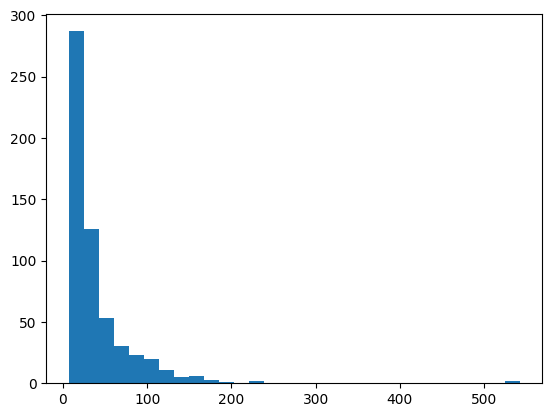

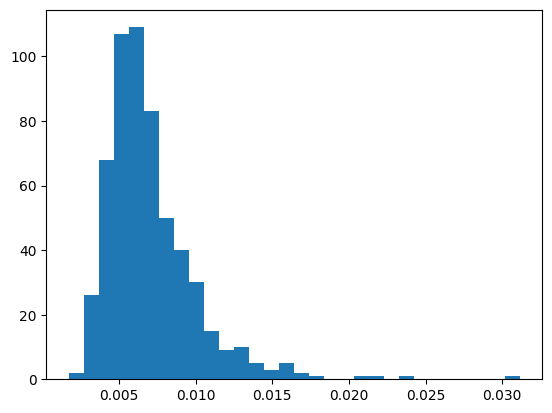

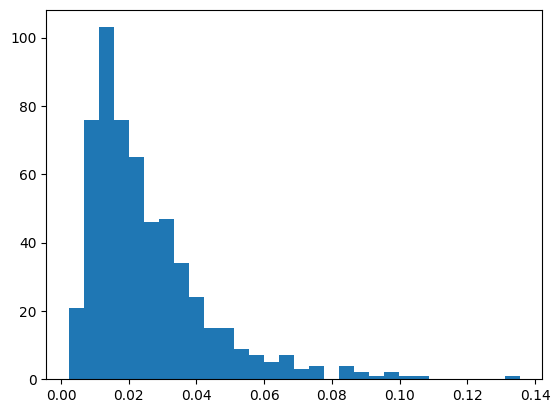

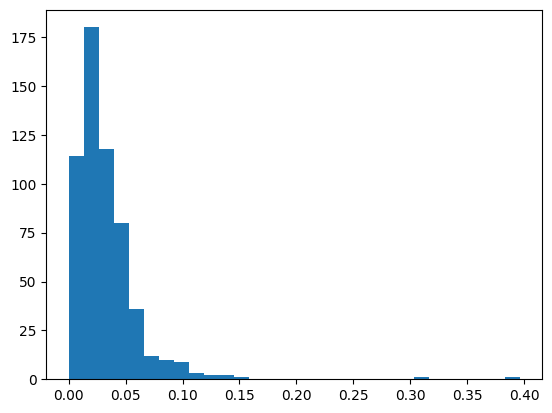

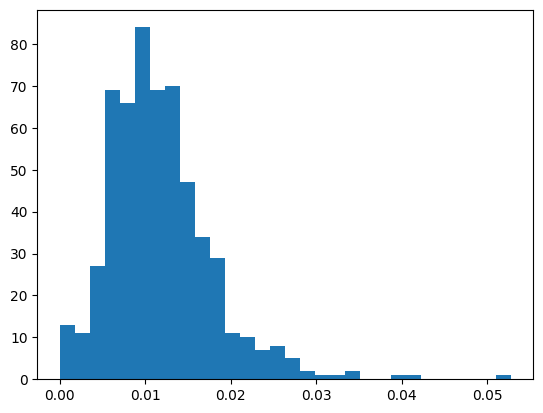

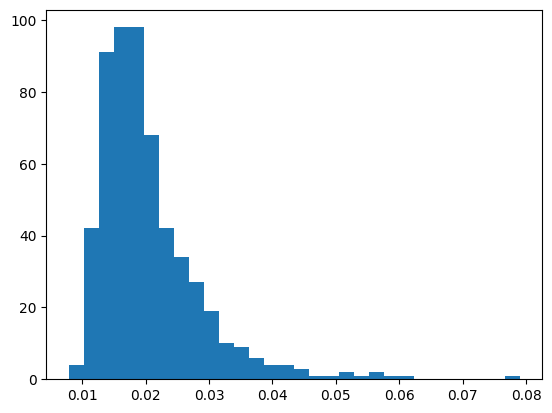

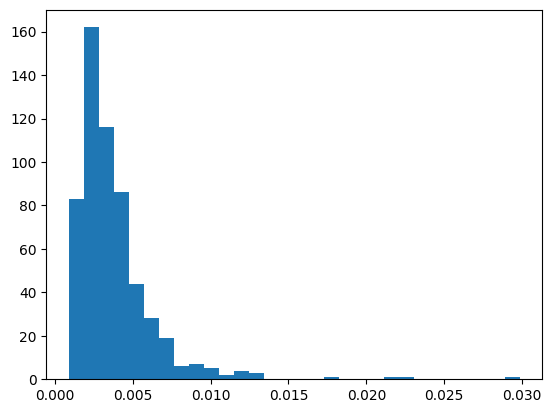

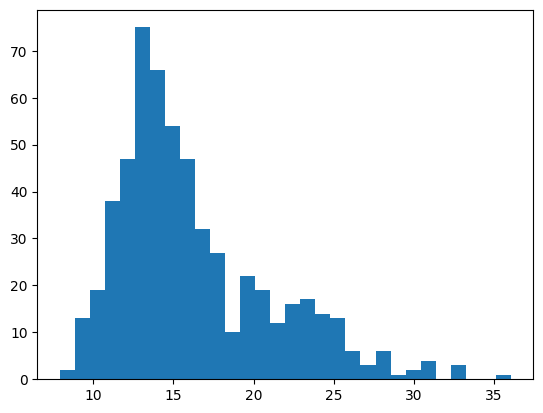

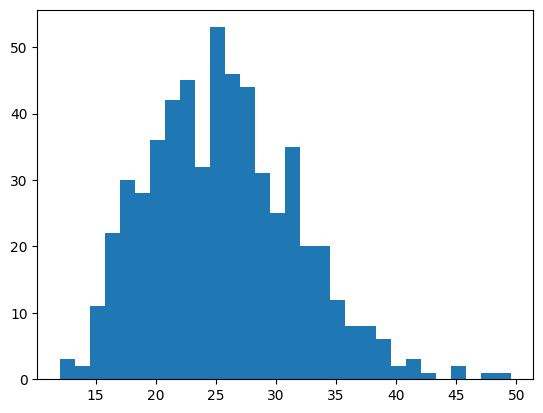

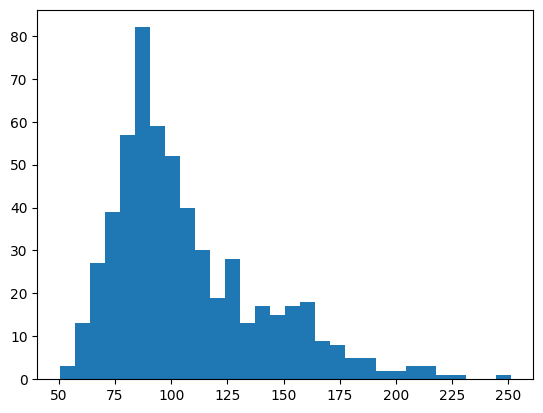

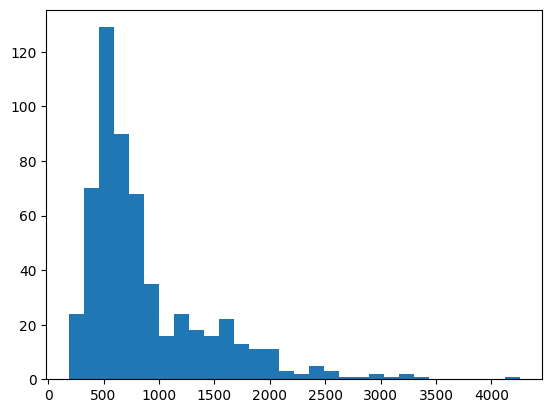

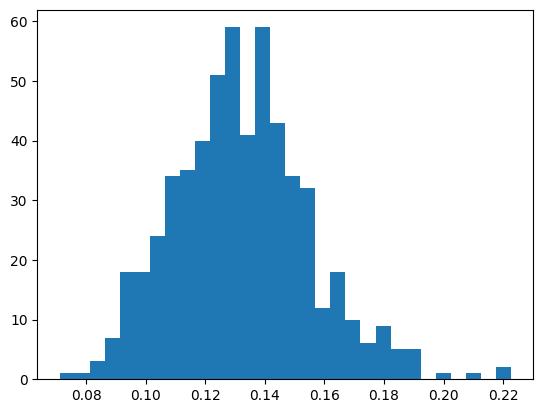

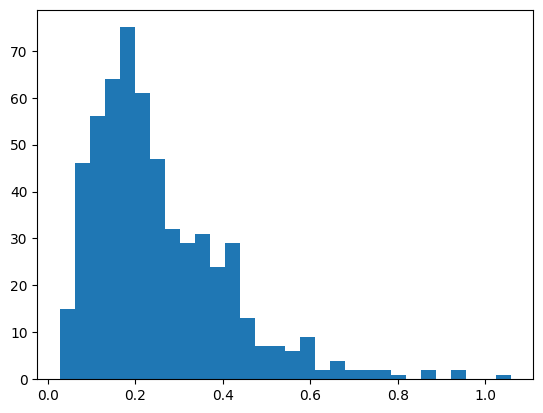

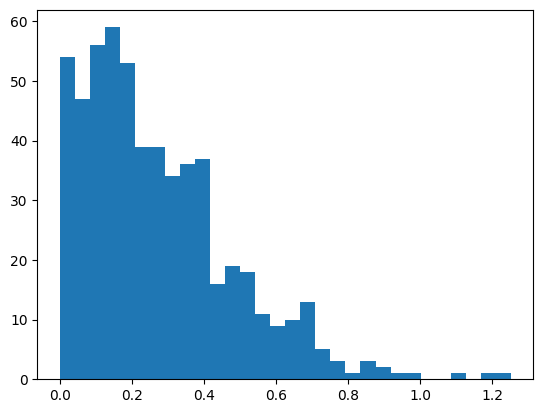

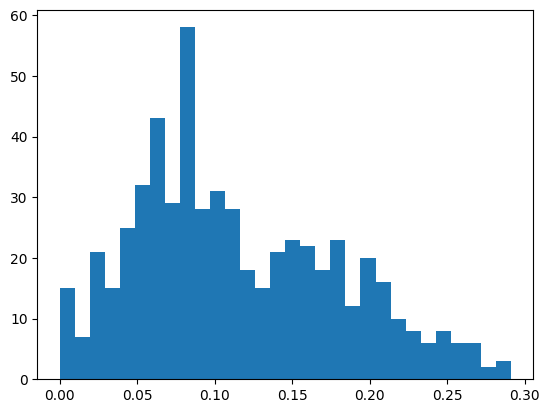

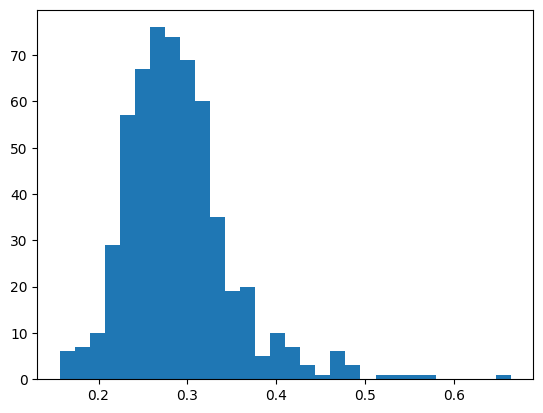

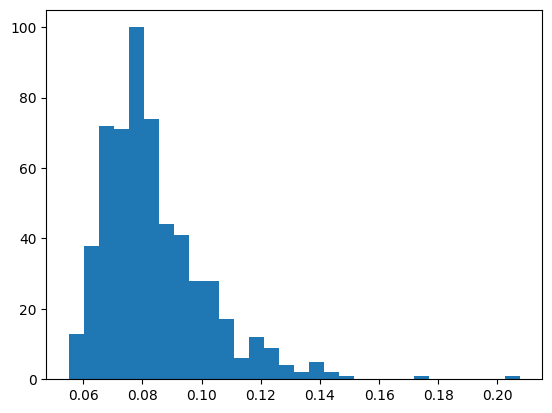

In [66]:
for i in range(30):
    plt.figure()
    plt.hist(cancer.data[:,i],30)

In [67]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [72]:
# cancer.target

In [83]:
#standardize
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(cancer.data)

from sklearn.preprocessing import MinMaxScaler
data01=MinMaxScaler().fit_transform(cancer.data)

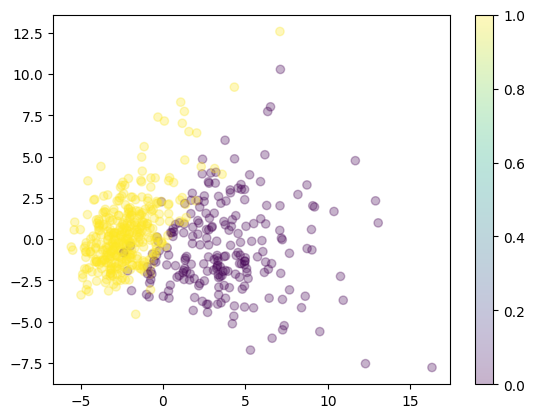

In [85]:
from sklearn.decomposition import PCA
# z=PCA(n_components=2,whiten=False).fit_transform(cancer.data)
z=PCA(n_components=2,whiten=False).fit_transform(standardized_data)
# z=PCA(n_components=2,whiten=False).fit_transform(data01)
# z
plt.scatter(z[:,0],z[:,1],c=cancer.target,alpha=0.3)
plt.colorbar()

In [96]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

scaler = MinMaxScaler()
data_scaled01 = scaler.fit_transform(cancer.data)

In [97]:
df = pd.DataFrame(data_scaled01, columns=cancer.feature_names)
# df = pd.DataFrame(data_scaled, columns=cancer.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433


In [107]:
X_trainandvalid, X_test, y_trainandvalid, y_test = train_test_split(df.to_numpy(), cancer.target, 
                                                    stratify=cancer.target, random_state=66)

In [114]:
# get a validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainandvalid, y_trainandvalid, 
   stratify=y_trainandvalid, random_state=66,test_size=0.5)

In [115]:
len(y_valid),sum(y_valid)

(213, 133)

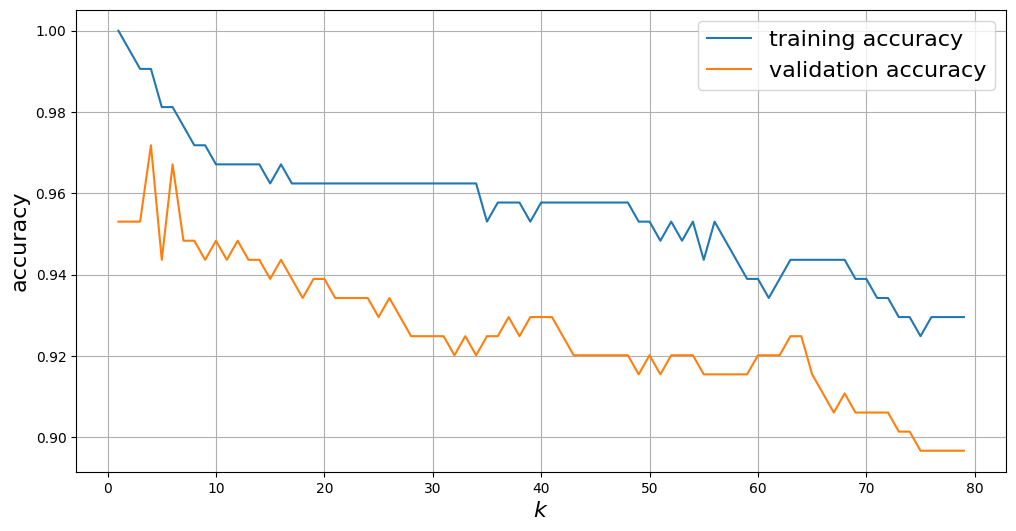

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 80)
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)# record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train)) # record generalization accuracy
    test_accuracy.append(clf.score(X_valid, y_valid))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="validation accuracy")
plt.ylabel("accuracy", fontsize=16)
plt.xlabel("$k$", fontsize=16)
plt.legend(fontsize=16)
plt.grid(1)
plt.savefig('train_test_accuracy_kNN.png', bbox_inches='tight');


In [120]:
#k=3 seems to be the best

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_trainandvalid, y_trainandvalid)# record training set accuracy
clf.score(X_test, y_test)

0.951048951048951

## Exercise 1:
( Prof. Dr. Helena Mihaljević )

On the sklearn Wine dataset (function `load_wine` from `sklearn.datasets`), perform a train-test split with 20% test data and `random_state=1`. Similar to the lecture, train a $k$NN model for $k$ from 1 to 30 on the training data and calculate the (in)accuracy on the train-test data. Graph the results as line plots in a figure. You can use the code from the lecture as a guide.

Other interesting chatGPT prompts:
- show an example on how to do knn density estimation in python
- show an example of knn classification in python, without sklearn
- show a numba fast implementation of knn
- benchmark numba vs sklearn on knn 


**Further presentations possibilities**:

G2Net Detecting Continuous Gravitational Waves

https://www.kaggle.com/competitions/g2net-detecting-continuous-gravitational-waves/overview/description

House Prices

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques


Forecast Store Sales

https://www.kaggle.com/competitions/store-sales-time-series-forecasting

Spaceship Titanic

https://www.kaggle.com/competitions/spaceship-titanic
